In [2]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [3]:
#loading the dataset
data = pd.read_csv('Advertising Budget and Sales.csv')
data.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


### Exploring 

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [118]:
data.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [114]:
#checking for null values
data.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [120]:
#checking for duplicates
data.duplicated().sum()

0

### Tidiness issues
 - Remove the special character($) in the column names
 - Replace the spaces with an underscore(_)

#### Removing the special character in the column names
#### Replace the spaces with an underscore(_)

In [122]:
# to remove the special character($) and replace the spaces with underscore, I'll just rename all the columns
data.rename({'TV Ad Budget ($)':'TV_Ad_Budget','Radio Ad Budget ($)':'Radio_Ad_Budget','Newspaper Ad Budget ($)':'Newspaper_Ad_Budget','Sales ($)':'Sales'},axis=1, inplace=True)

###### Test

In [124]:
list(data)

['Unnamed: 0',
 'TV_Ad_Budget',
 'Radio_Ad_Budget',
 'Newspaper_Ad_Budget',
 'Sales']

### Visualization

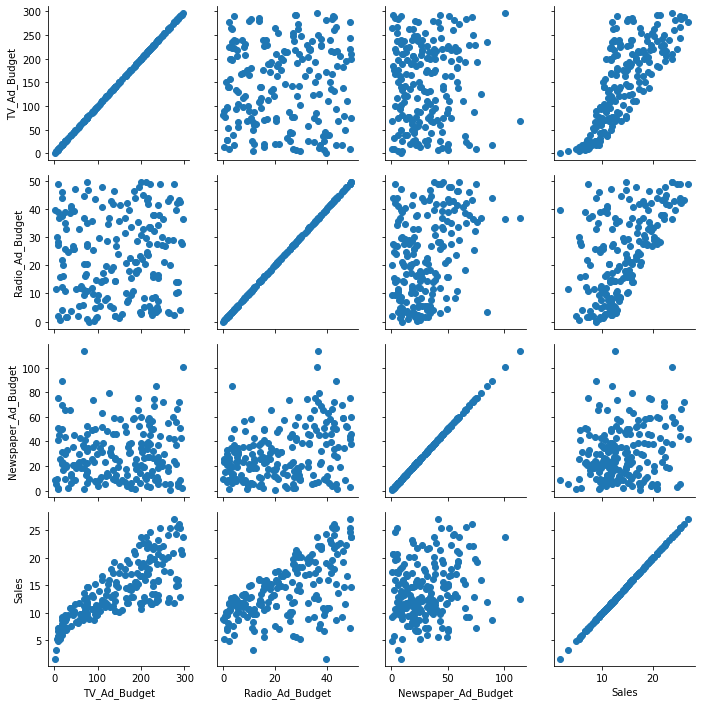

In [135]:
g = sb.PairGrid(data=data, vars=['TV_Ad_Budget','Radio_Ad_Budget','Newspaper_Ad_Budget','Sales'])
g.map(plt.scatter)

#### From the plots we see that the Radio_Ad_Budget and TV_Ad_Budget have some kind of correlation wth the sales but Newspaper_Ad_Budget has an insignificant or no correletion wuth the sales.

### Let's look more closely at the Tv_Ad_Budget and the Radio_Ad_Budget

In [150]:
#defining a function for labeling x,y axis and title of the graph

def label(x,y,title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title, fontsize=15)

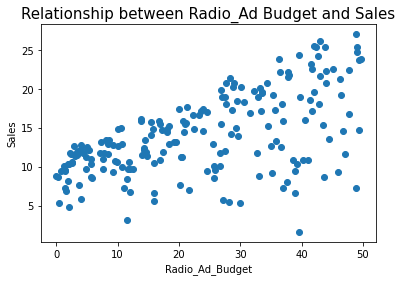

In [151]:
plt.scatter(data['Radio_Ad_Budget'], data['Sales'])

label('Radio_Ad_Budget','Sales', 'Relationship between Radio_Ad Budget and Sales')

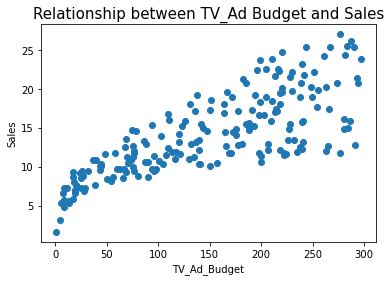

In [154]:
plt.scatter(data['TV_Ad_Budget'], data['Sales'])
label('TV_Ad_Budget','Sales', 'Relationship between TV_Ad Budget and Sales')

#### According to the two plots we see a stronger linear correlation between the sales and Tv_budget. Seems the TV_budget strongly determines how much sales is made. If thought about very well you would realize that the reason could be more people use TV than any of the remaining two media transmisson tools, as a result spening more on advertising on TV would increase sales than the rest. I'm just going to use TV_Ad_Budget and Sales correlation for the the rest of my analysis.

## Getting my Features And Labels ready
 - Identify my features and Labels
 - Split my datasets into training and test set
 

In [155]:
#function to calculate my mean squared error
def cost_fn(m, b, points):
    total_err=0
    for i in range (len(points)):
        x=points.iloc[i].TV_Ad_Budget
        y=points.iloc[i].Sales
        total_err += ((m * x + b)-y)**2
    cost_function = total_err/float(len(points))
    return cost_function


In [156]:
#function to calculate my the total gradient descent for the regression line parameters m,b 
def gradient_descent(m_now, b_now, points, L):
    m_gradient=0
    b_gradient=0
    
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].TV_Ad_Budget
        y=points.iloc[i].Sales
        
        m_gradient += -(2/n) * x * (y-(m_now*x + b_now))
        b_gradient += -(2/n) * (y-(m_now *x +b_now))
        
    m=m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [24]:
#function to calculate the accuracy score
def score(X, y, m, c, df ):
    error = 0
    SST = 0
    y_mean = sum(y)/len(df)
    for i in range(len(df)):
        x= df.iloc[i].TV_Ad_Budget
        y = df.iloc[i].Sales
        error += (y-(m * x + c))**2
        SST += (y-y_mean)**2
    r_score = 1-(error/SST)
    
    return r_score
        

In [157]:
df = data.loc[:,['TV_Ad_Budget','Sales']]

In [158]:
length=len(df)

In [159]:
X=df.iloc[:,0]

In [160]:
y=df.iloc[:,1]

In [17]:
# splitting the the Test and Training set
X_train= df.TV_Ad_Budget.sample(int((80/100)*length))
X_test = df[~df.TV_Ad_Budget.isin(X_train)].TV_Ad_Budget
y_train=df[df.TV_Ad_Budget.isin( X_train)].Sales
y_test = df[~df.Sales.isin(y_train)].Sales

In [59]:
frame=pd.DataFrame(X_train)
frame1=pd.DataFrame(X_test)

In [161]:
# putting the training parameters together to become a training set and the testing parameters together to make the test set
training_set = pd.concat([frame,y_train],axis=1, join='inner')
test_set = pd.concat([frame1, y_test], axis=1, join = 'inner')

### Getting the regression line parameters m and b that fits best (Training the dataset)

In [63]:
#setting my learning rate(L) to 0.0001 and epoch value to 350000. This took sometime
m=0
b=0
L=0.00001
epochs =350000
data= training_set
for i in range(epochs):
    if i % 5000 ==0:
        print(i)
    m, b = gradient_descent(m, b, data, L)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000


In [164]:
print('m = ', m,'and', 'b = ', b)

m =  0.05440637040254276 and b =  5.872787308087114


In [ ]:
training_set.reset_index(drop=True, inplace=True)

In [165]:
training_set

,TV_Ad_Budget,Sales
3,151.5,18.5
67,139.3,13.4
15,195.4,22.4
64,131.1,18.0
172,19.6,7.6
...,...,...
123,123.1,15.2
38,43.1,10.1
179,165.6,12.6
127,80.2,8.8


In [166]:
#getting the training score
training_score = score(training_set.TV_Ad_Budget, training_set.Sales,0.05440637040254276, 5.872787308087114, training_set)
print("Training score = ", training_score)

Training score =  0.6070374630094064


In [168]:
#getting the test score
test_score = score(training_set.TV_Ad_Budget, training_set.Sales,0.05440637040254276, 5.872787308087114, test_set)
print("Test Score = ", test_score)

Test Score =  0.999803516826479


#### The training and testing scores look pretty good. We move!!


##### Checking the mean square error of the training set and test set

In [88]:
print("Cost function of training set = ",cost_fn(0.05440637040254276, 5.872787308087114,training_set))


Cost function of training set =  11.285206201993544


In [89]:
print("Cost function of test set = ",cost_fn(0.05440637040254276, 5.872787308087114,test_set))

Cost function of test set =  6.873657458023801


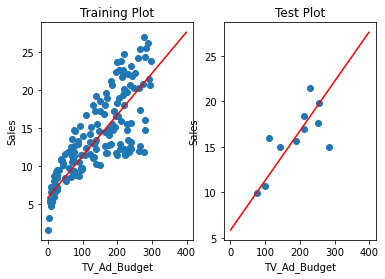

In [225]:
# Plot to show the testing and training set

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(training_set.TV_Ad_Budget, training_set.Sales)
ax1.plot(list(range(0,400)),[m*x+b for x in range(0,400)], color='red')
ax1.set_ylabel('Sales')
ax1.set_xlabel('TV_Ad_Budget')
ax1.title.set_text('Training Plot')



ax2.scatter(test_set.TV_Ad_Budget, test_set.Sales)
ax2.plot(list(range(0,400)),[m*x+b for x in range(0,400)], color='red')
ax2.set_ylabel('Sales')
ax2.set_xlabel('TV_Ad_Budget')
ax2.title.set_text('Test Plot')


##### Predicting

In [226]:
#predicting
x= list(range(0,400))
y= [m*x+b for x in range(0,400)]



np.interp(80.2, x,y)


10.236178214371042